In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.datasets import ImageFolder
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import mobilenet_v2
from sklearn.metrics import accuracy_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



data_dir = '/kaggle/input/colorectal-cancer/Dataset 1/Colorectal Cancer '


classes = ['MUS', 'NORM', 'STR']


images = []
labels = []


for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.tif'):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            images.append(image)
            labels.append(class_name)


X = np.array(images)
y = np.array(labels)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




Using cuda device
Training with learning rate: 1e-09
Epoch 1/25, Train Loss: 1.1839927589893342, Train Accuracy: 0.32625, Validation Loss: 1.1633537066610236, Validation Accuracy: 0.30833333333333335
Epoch 2/25, Train Loss: 1.1842404703299205, Train Accuracy: 0.32666666666666666, Validation Loss: 1.1620311172384965, Validation Accuracy: 0.31166666666666665
Epoch 3/25, Train Loss: 1.1833854214350383, Train Accuracy: 0.32666666666666666, Validation Loss: 1.1635143317674335, Validation Accuracy: 0.315
Epoch 4/25, Train Loss: 1.183612676858902, Train Accuracy: 0.33270833333333333, Validation Loss: 1.1650270976518329, Validation Accuracy: 0.325
Epoch 5/25, Train Loss: 1.1839143363634745, Train Accuracy: 0.33145833333333335, Validation Loss: 1.165335077988474, Validation Accuracy: 0.31166666666666665
Epoch 6/25, Train Loss: 1.1841136884689332, Train Accuracy: 0.32645833333333335, Validation Loss: 1.1640662080363224, Validation Accuracy: 0.30666666666666664
Epoch 7/25, Train Loss: 1.184506076

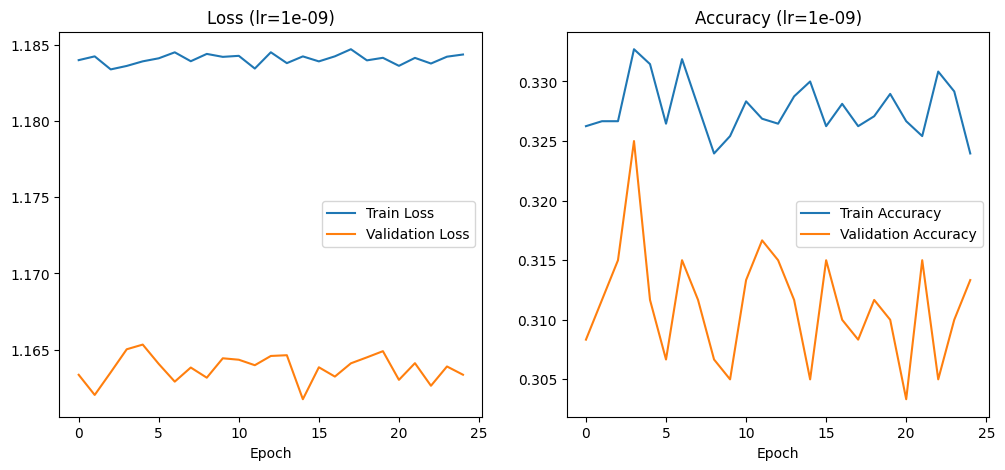

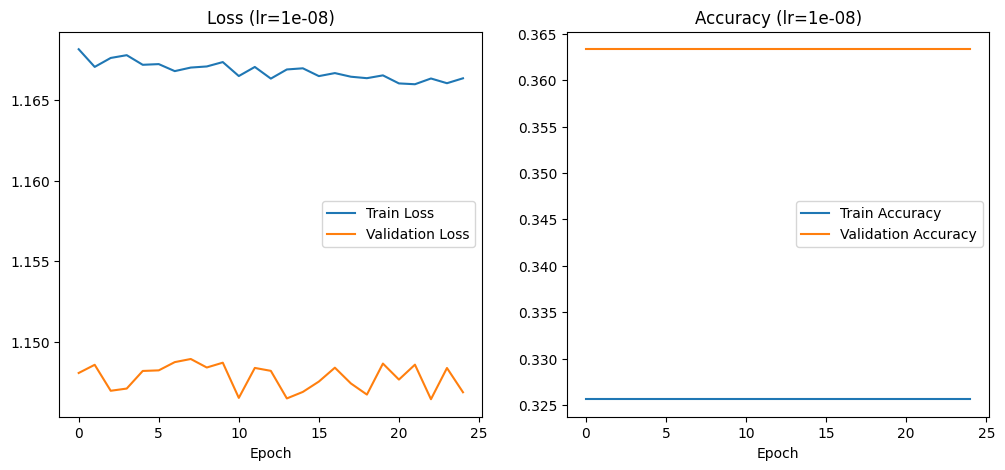

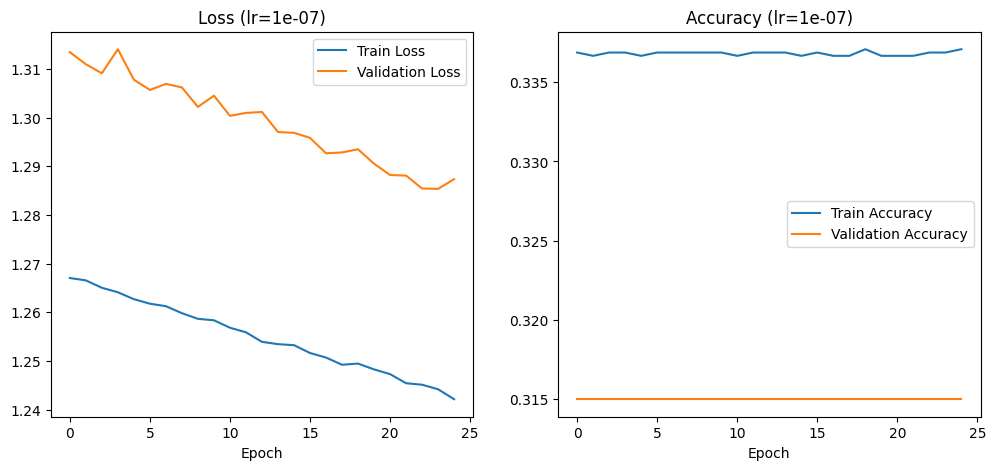

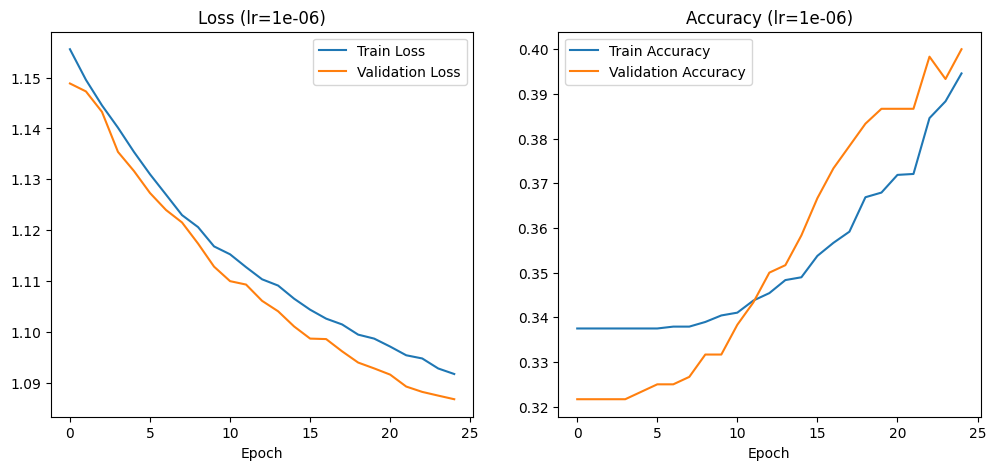

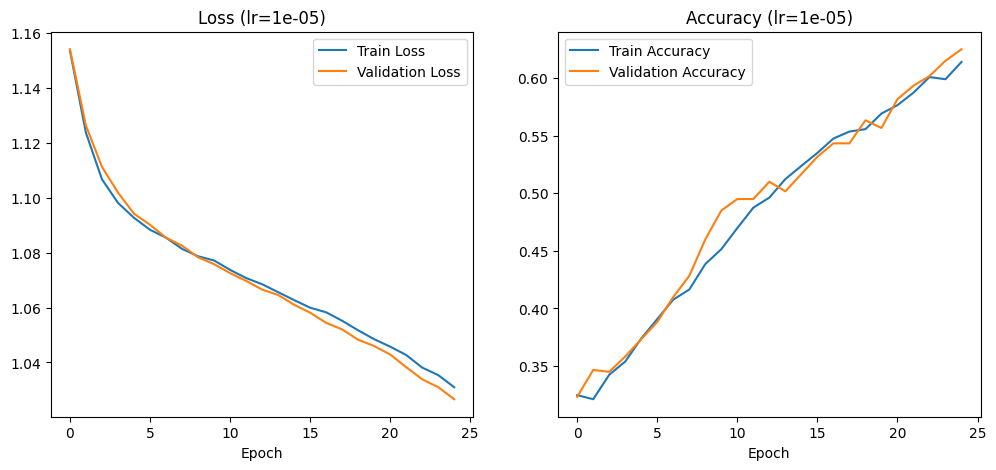

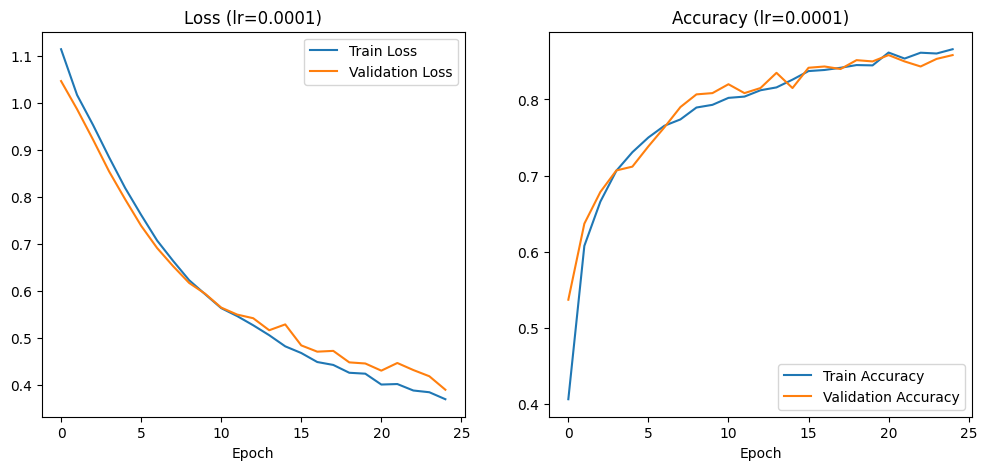

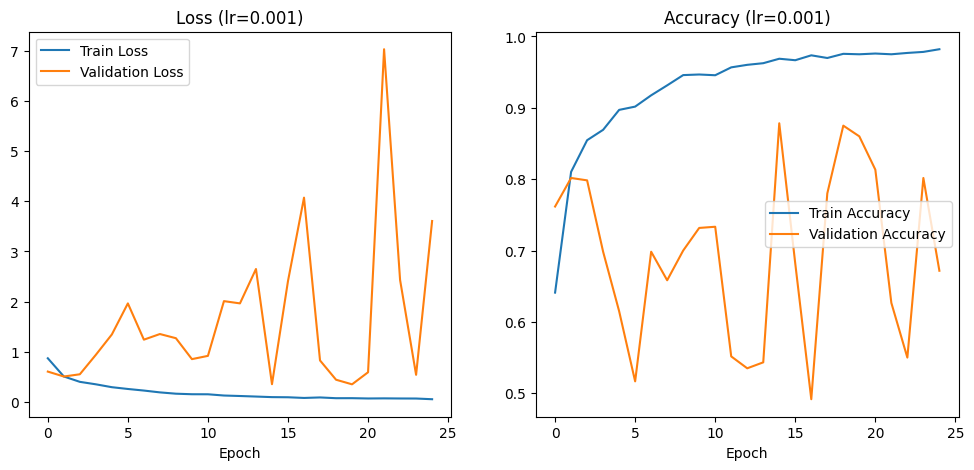

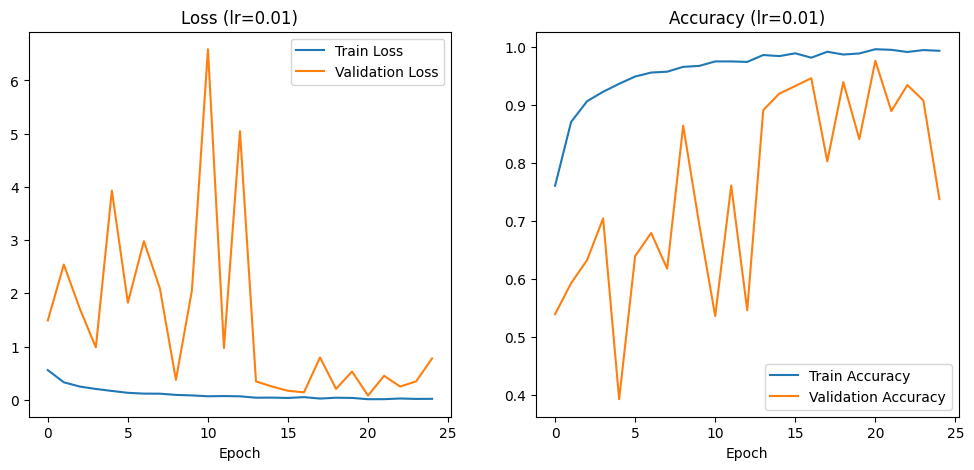

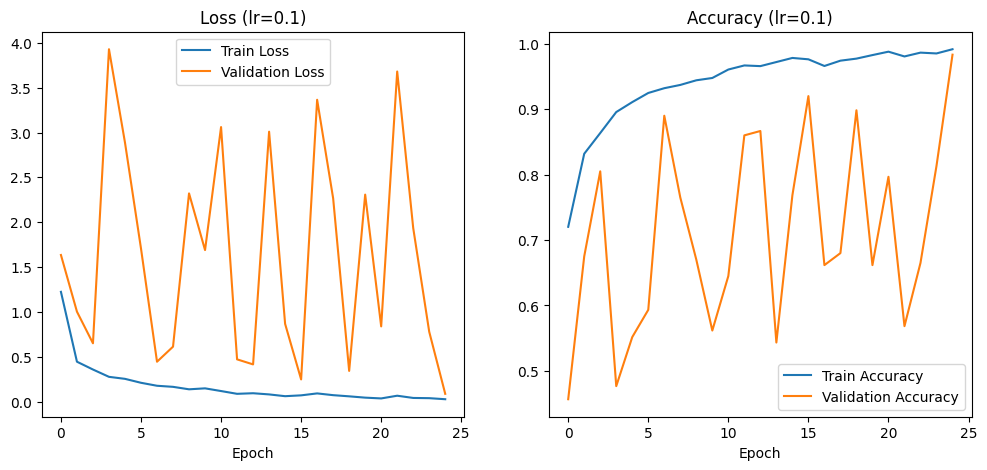

Learning Rate: 1e-09
Final Train Loss: 1.1844, Final Train Accuracy: 0.3240
Final Validation Loss: 1.1634, Final Validation Accuracy: 0.3133
Learning Rate: 1e-08
Final Train Loss: 1.1664, Final Train Accuracy: 0.3256
Final Validation Loss: 1.1468, Final Validation Accuracy: 0.3633
Learning Rate: 1e-07
Final Train Loss: 1.2421, Final Train Accuracy: 0.3371
Final Validation Loss: 1.2874, Final Validation Accuracy: 0.3150
Learning Rate: 1e-06
Final Train Loss: 1.0917, Final Train Accuracy: 0.3946
Final Validation Loss: 1.0867, Final Validation Accuracy: 0.4000
Learning Rate: 1e-05
Final Train Loss: 1.0310, Final Train Accuracy: 0.6140
Final Validation Loss: 1.0266, Final Validation Accuracy: 0.6250
Learning Rate: 0.0001
Final Train Loss: 0.3695, Final Train Accuracy: 0.8660
Final Validation Loss: 0.3897, Final Validation Accuracy: 0.8583
Learning Rate: 0.001
Final Train Loss: 0.0529, Final Train Accuracy: 0.9821
Final Validation Loss: 3.6065, Final Validation Accuracy: 0.6717
Learning Rat

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt

# Define hyperparameters
batch_size = 32
learning_rates = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]  # List of learning rates to try
epochs = 25

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),  # Ensure input is a PIL image
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply transformations to your data
X_train_transformed = torch.stack([data_transform(x) for x in X_train])
X_val_transformed = torch.stack([data_transform(x) for x in X_val])

# Convert data to PyTorch tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_transformed, y_train_tensor)
val_dataset = TensorDataset(X_val_transformed, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define ResNet-18 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Loop over different learning rates
results = {'lr': [], 'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}

for lr in learning_rates:
    model = resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, len(classes))
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr,momentum=0.6)
    print(f"Training with learning rate: {lr}")

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training and Validation loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_loss = val_running_loss / len(val_loader)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

    results['lr'].append(lr)
    results['train_loss'].append(train_losses)
    results['train_accuracy'].append(train_accuracies)
    results['val_loss'].append(val_losses)
    results['val_accuracy'].append(val_accuracies)

# Plot the results
for i, lr in enumerate(learning_rates):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(results['train_loss'][i], label='Train Loss')
    plt.plot(results['val_loss'][i], label='Validation Loss')
    plt.title(f'Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(results['train_accuracy'][i], label='Train Accuracy')
    plt.plot(results['val_accuracy'][i], label='Validation Accuracy')
    plt.title(f'Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Output summary
for i, lr in enumerate(learning_rates):
    final_train_loss = results['train_loss'][i][-1]
    final_train_accuracy = results['train_accuracy'][i][-1]
    final_val_loss = results['val_loss'][i][-1]
    final_val_accuracy = results['val_accuracy'][i][-1]
    
    print(f"Learning Rate: {lr}")
    print(f"Final Train Loss: {final_train_loss:.4f}, Final Train Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}, Final Validation Accuracy: {final_val_accuracy:.4f}")
    print("=" * 50)

# Find the best learning rate based on validation accuracy
best_lr_index = results['val_accuracy'].index(max(results['val_accuracy']))
best_lr = learning_rates[best_lr_index]

print(f"The best learning rate is: {best_lr}")


Using cuda device


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training with batch size: 32
Epoch 1/25, Train Loss: 1.0998, Train Accuracy: 0.3771, Validation Loss: 1.0709, Validation Accuracy: 0.4617
Epoch 2/25, Train Loss: 1.0473, Train Accuracy: 0.5244, Validation Loss: 1.0220, Validation Accuracy: 0.6033
Epoch 3/25, Train Loss: 0.9927, Train Accuracy: 0.6027, Validation Loss: 0.9549, Validation Accuracy: 0.6683
Epoch 4/25, Train Loss: 0.9268, Train Accuracy: 0.6504, Validation Loss: 0.8856, Validation Accuracy: 0.6783
Epoch 5/25, Train Loss: 0.8635, Train Accuracy: 0.6885, Validation Loss: 0.8340, Validation Accuracy: 0.7150
Epoch 6/25, Train Loss: 0.8103, Train Accuracy: 0.7102, Validation Loss: 0.7848, Validation Accuracy: 0.7567
Epoch 7/25, Train Loss: 0.7602, Train Accuracy: 0.7446, Validation Loss: 0.7394, Validation Accuracy: 0.7633
Epoch 8/25, Train Loss: 0.7165, Train Accuracy: 0.7631, Validation Loss: 0.7060, Validation Accuracy: 0.7833
Epoch 9/25, Train Loss: 0.6774, Train Accuracy: 0.7798, Validation Loss: 0.6681, Validation Accurac

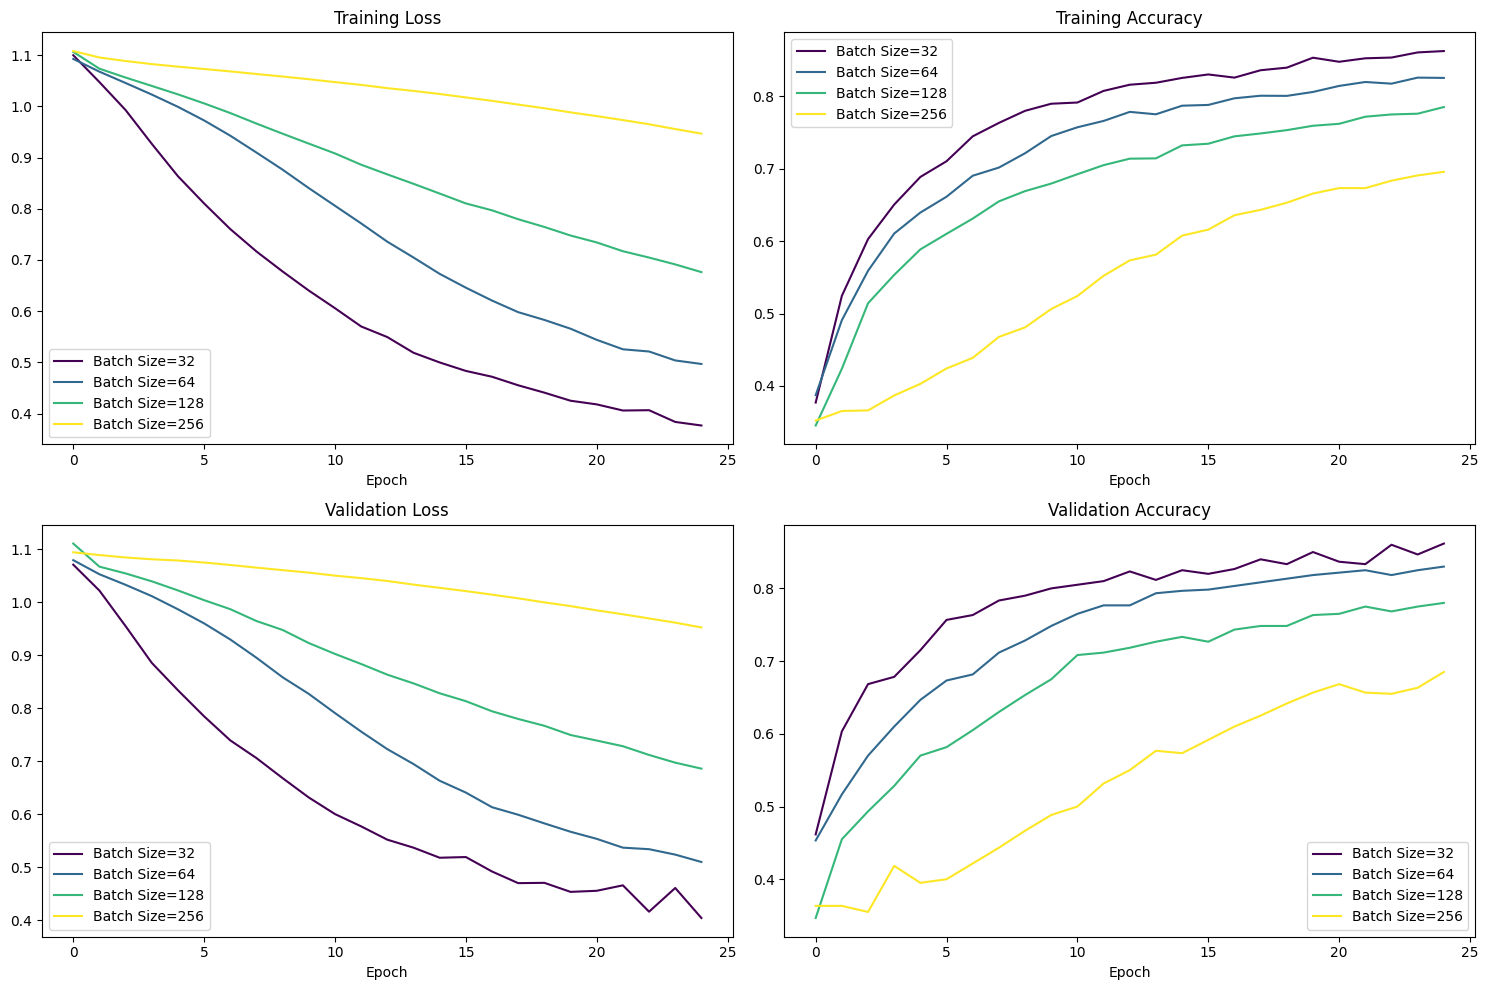

Batch Size: 32
Final Train Loss: 0.3766, Final Train Accuracy: 0.8623
Final Validation Loss: 0.4043, Final Validation Accuracy: 0.8617
Batch Size: 64
Final Train Loss: 0.4968, Final Train Accuracy: 0.8252
Final Validation Loss: 0.5100, Final Validation Accuracy: 0.8300
Batch Size: 128
Final Train Loss: 0.6762, Final Train Accuracy: 0.7850
Final Validation Loss: 0.6861, Final Validation Accuracy: 0.7800
Batch Size: 256
Final Train Loss: 0.9467, Final Train Accuracy: 0.6956
Final Validation Loss: 0.9524, Final Validation Accuracy: 0.6850


In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameters
batch_sizes = [32, 64, 128, 256]  # List of batch sizes to try
learning_rate = 0.0001 
epochs = 25

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),  # Ensure input is a PIL image
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply transformations to your data
X_train_transformed = torch.stack([data_transform(x) for x in X_train])
X_val_transformed = torch.stack([data_transform(x) for x in X_val])

# Convert data to PyTorch tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_transformed, y_train_tensor)
val_dataset = TensorDataset(X_val_transformed, y_val_tensor)

# Define ResNet-18 model and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# Define loss function
criterion = nn.CrossEntropyLoss()

# Directory for saving models
model_save_dir = 'saved_models'
os.makedirs(model_save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Loop over different batch sizes
results = {'batch_size': [], 'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}

for batch_size in batch_sizes:
    # Initialize the model for each batch size
    model = resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, len(classes))
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.6)

    # Create DataLoader for training and validation sets with the current batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    print(f"Training with batch size: {batch_size}")

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training and Validation loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)

        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_loss = val_running_loss / len(val_loader)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Save the trained model for each batch size
    model_save_path = os.path.join(model_save_dir, f'model_batch_size_{batch_size}.pth')
    torch.save(model.state_dict(), model_save_path)
    print(f"Model trained with batch size {batch_size} saved to {model_save_path}")

    results['batch_size'].append(batch_size)
    results['train_loss'].append(train_losses)
    results['train_accuracy'].append(train_accuracies)
    results['val_loss'].append(val_losses)
    results['val_accuracy'].append(val_accuracies)

# Plotting results
colors = plt.cm.viridis(np.linspace(0, 1, len(batch_sizes)))
plt.figure(figsize=(15, 10))

# Plot training loss
plt.subplot(2, 2, 1)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(results['train_loss'][i], label=f'Batch Size={batch_size}', color=colors[i])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training accuracy
plt.subplot(2, 2, 2)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(results['train_accuracy'][i], label=f'Batch Size={batch_size}', color=colors[i])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 3)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(results['val_loss'][i], label=f'Batch Size={batch_size}', color=colors[i])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 4)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(results['val_accuracy'][i], label=f'Batch Size={batch_size}', color=colors[i])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Print final losses and accuracies
for i, batch_size in enumerate(batch_sizes):
    final_train_loss = results['train_loss'][i][-1]
    final_train_accuracy = results['train_accuracy'][i][-1]
    final_val_loss = results['val_loss'][i][-1]
    final_val_accuracy = results['val_accuracy'][i][-1]
    
    print(f"Batch Size: {batch_size}")
    print(f"Final Train Loss: {final_train_loss:.4f}, Final Train Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}, Final Validation Accuracy: {final_val_accuracy:.4f}")
    print("=" * 50)
